In [1]:
#librerías
import pandas as pd
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#data wrangling + EDA
df = pd.read_csv ('banknote_authentication.csv')
df

,V1,V2,V3,V4,Class
0,3.62160,8.66610,-2.8073,-0.44699,1
1,4.54590,8.16740,-2.4586,-1.46210,1
2,3.86600,-2.63830,1.9242,0.10645,1
3,3.45660,9.52280,-4.0112,-3.59440,1
4,0.32924,-4.45520,4.5718,-0.98880,1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,2
1368,-1.38870,-4.87730,6.4774,0.34179,2
1369,-3.75030,-13.45860,17.5932,-2.77710,2
1370,-3.56370,-8.38270,12.3930,-1.28230,2


In [3]:
#tipos de datos
df.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
Class      int64
dtype: object

In [9]:
#renombre las variables
df.columns = ['varianza_de_imagen', 'sesgo_de_imagen', 'curtosis', 'entropia', 'clase']
df.columns

Index(['varianza_de_imagen', 'sesgo_de_imagen', 'curtosis', 'entropia',
       'clase'],
      dtype='object')

<AxesSubplot:>

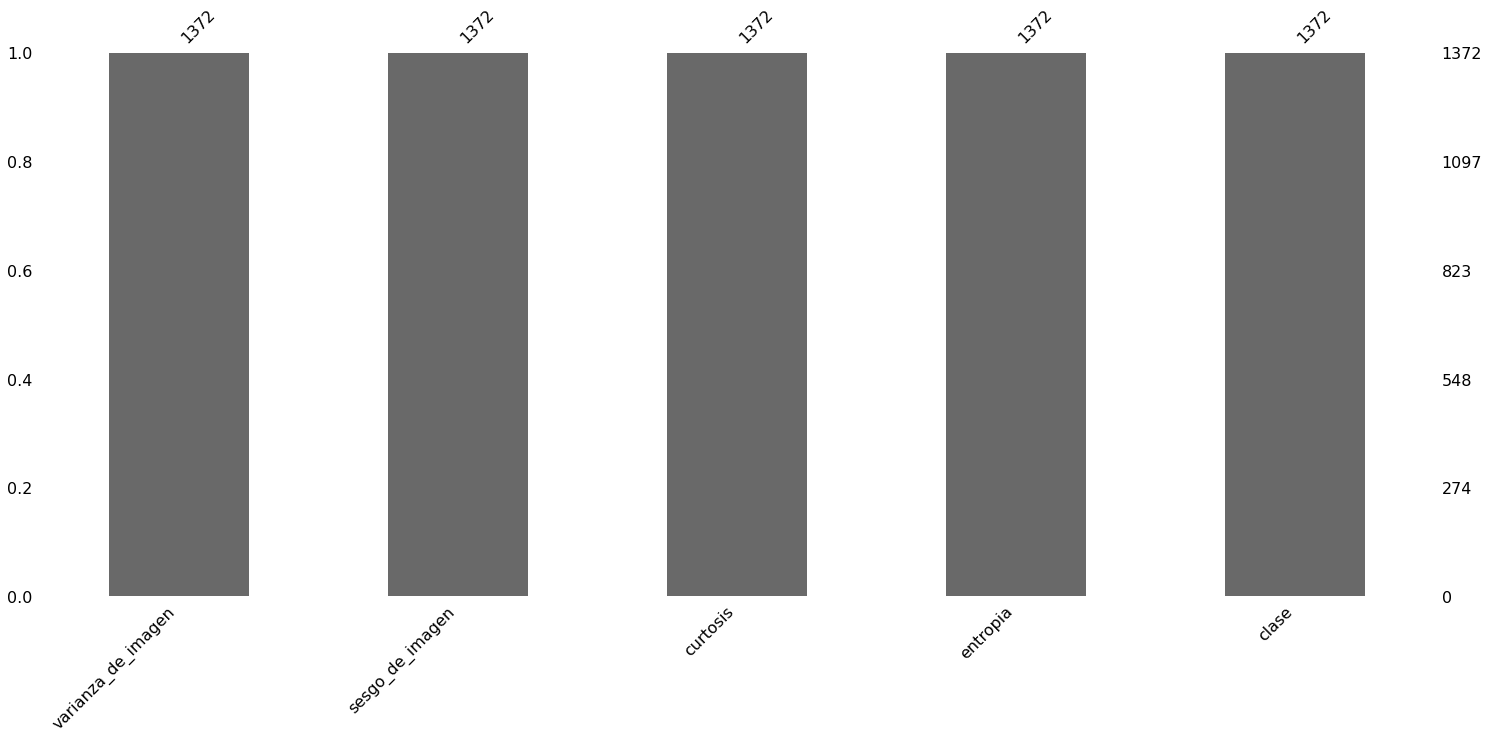

In [30]:
msno.bar(df)
#uso de grafico de barras para visualizar los datos de los valores perdidos
#las barras  muestran los valores que son proporcionales a los datos que no faltan en el conjunto de datos. 
#Junto con eso, también se muestra el número de valores que faltan.
#Dado que las observaciones son un total de 1372, las columnas con menos valores contienen valores perdido

no se encuentran valores perdidos

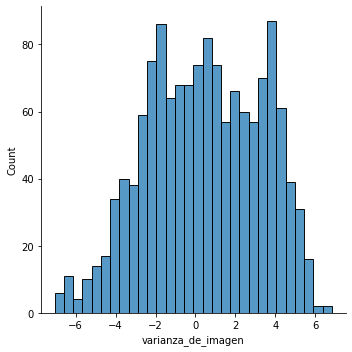

In [11]:
#análisis univariado
sns.displot(df.varianza_de_imagen.dropna(), kde=False, bins=30)

podemos observar que existen asimetrias en los valores extremos, y que hay picos en los valores -2 y 4, con cambios no significativos en el medio de estos valores de varianza de la imagen transformada

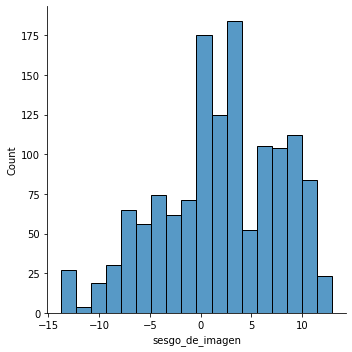

In [12]:
sns.displot(df.sesgo_de_imagen.dropna());

In [13]:
#otro gráfico con la misma variable anterior
px.histogram(df,
            x = 'sesgo_de_imagen')

la variable V2 corresponde a sesgo de la imagen transformada, en los gráficos observamos que existe pico de sesgos en los valores entre 0 y 5

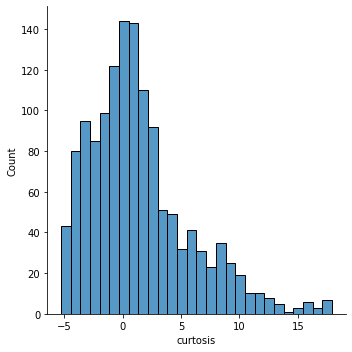

In [14]:
sns.displot(df.curtosis.dropna(), kde=False)

la variable curtosis de la imagen transformada Wavelet también presena picos entre los valores 0 y 3

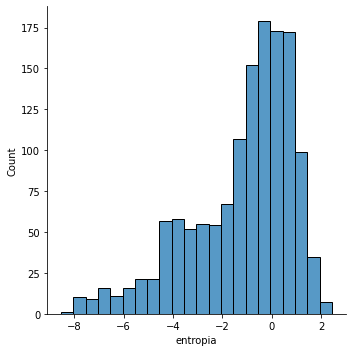

In [15]:
sns.displot(df.entropia.dropna(), kde=False)

la variable entropía de la imagen presenta una asimetría hacia la izquierda donde presumimos que es donde se encuentran los billetes con mayor grado de no originalidad

las 4 variables analizadas son numericas, por lo cual decidí hacer scatterplots para poder visualizar las posibles relaciones entre ellas

Text(0.5, 1.0, 'Relacion entre varianza y sesgo')

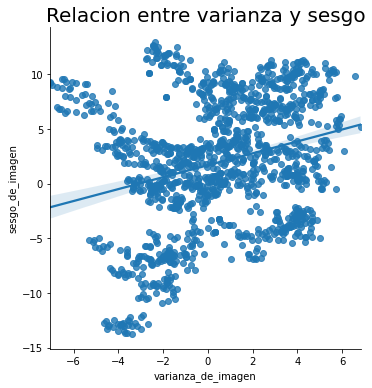

In [17]:
#análisis bivariado
#relacion entre varianza y sesgo de la imagen
sns.lmplot(x="varianza_de_imagen", y="sesgo_de_imagen", data=df)
plt.title('Relacion entre varianza y sesgo', fontsize = 20, fontweight = 30)

Para poder visualizar mejor la posible relación entre las variables, sumé una línea de regresión. Así, vemos que se observa una relación entre varianza de la imagen y el sesgo de la imagen de tipo positiva, significa que a mayor varianza incremente el sesgo de la imagen también

Text(0.5, 1.0, 'Relacion entre curtosis y entropia')

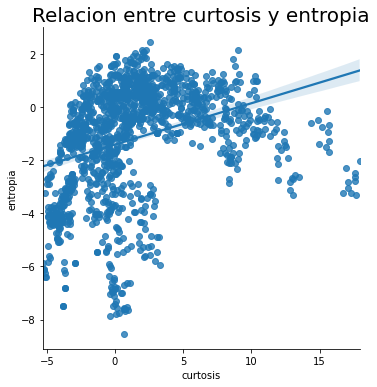

In [18]:
sns.lmplot(x="curtosis", y="entropia", data=df)
plt.title('Relacion entre curtosis y entropia', fontsize = 20, fontweight = 30)

La pendiente positiva indica que existe una relación entre curtosis de la imagen transformada y entropia. A mayor curtosis, mayor entropía

<AxesSubplot:xlabel='curtosis', ylabel='entropia'>

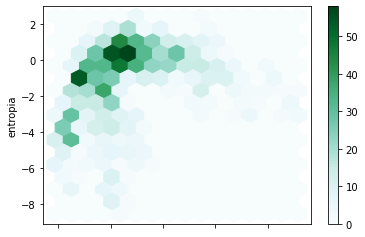

In [19]:
#prueba con una gráfica hexagonal
df.plot.hexbin(x='curtosis', y='entropia', gridsize=15)

obtenemos la misma información que el scatterplot

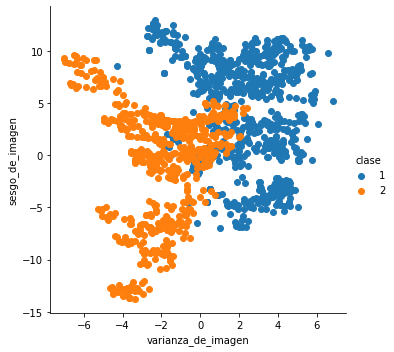

In [20]:
#análisis multivariado
#FacetGrid - sepal_length vs sepal_width
sns.FacetGrid(df,hue = 'clase' , size = 5).map(plt.scatter,'varianza_de_imagen','sesgo_de_imagen').add_legend();
plt.show()

Analizamos las variables "varianza de imagen" y "sesgo de imagen" a partir de poder separarlas por clase, donde 1 corresponde a "presumiblemente genuino" y 2 corresponde a "forjado"

de la misma manera lo hicimos para las variables "curtosis" y "entropia"

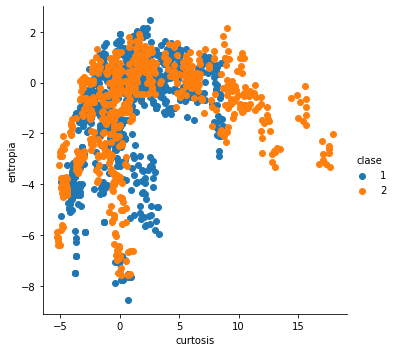

In [22]:
sns.FacetGrid(df,hue = 'clase' , size = 5).map(plt.scatter,'curtosis','entropia').add_legend();
plt.show()

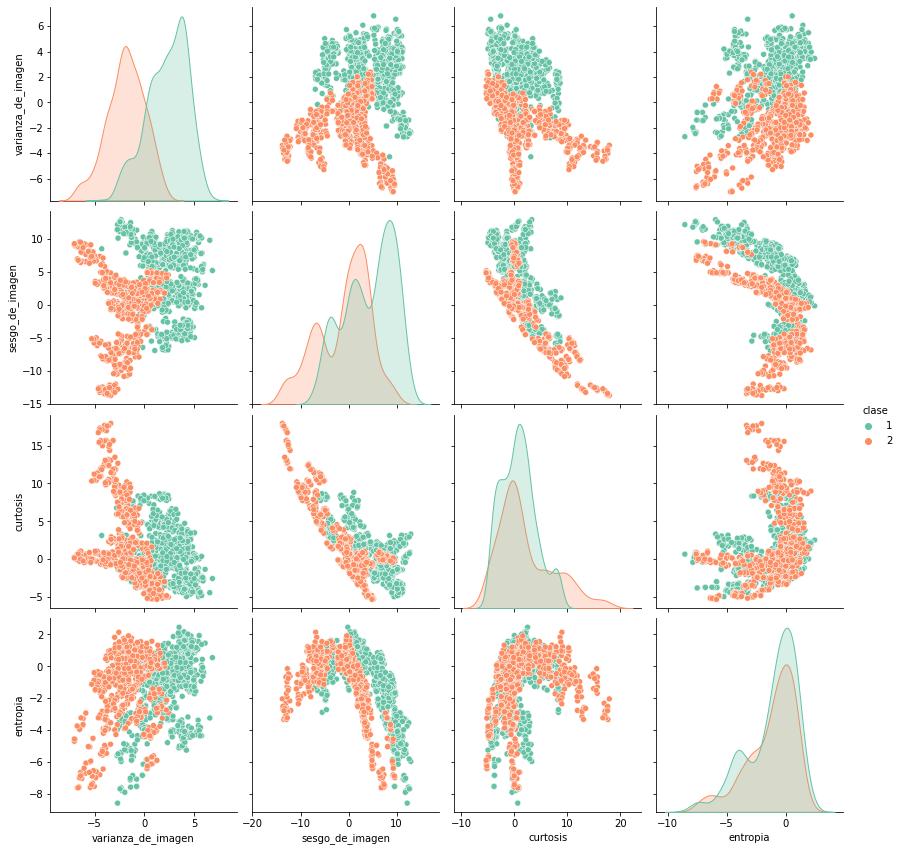

In [23]:
#Pairplot
sns.pairplot(df,hue = 'clase' , size = 3 , palette = 'Set2')

Con pairplot, diferenciamos los scatterplots e histogramas por la variable que quiero predecir (clase -> si los billetes son falsos o verdaderos) En este caso, en los histogramas, se puede visualizar que los billetes "genuinos" (1) tienen una mayor varianza de imagen. Lo mismo sucede con las otras variables, a mayor sesgo, curtosis y entropía los billetes genuinos son las que presentan una mayor distribución.
Otra visualización llamativa es la variable curtosis, en los scatterplots se puede ver que a mayores niveles de curtosis, más asociado está a billetes falsos con relación a las otras variables.

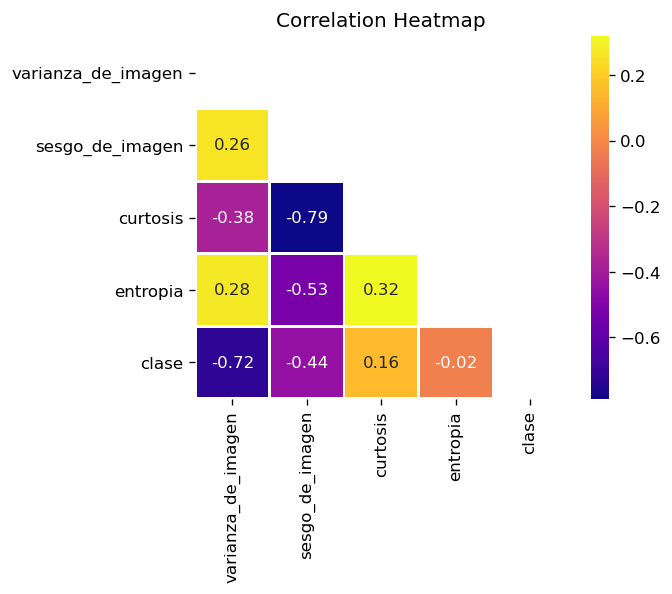

In [24]:
#Correlaciones
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

En el mapa de calor, se puede visualizar que en entropia y curtosis hay una leve asociación positiva, lo mismo sucede con entropía-varianza de imagen y sesgo de imagen-varianza de imagen. Con menor asociación positiva se encuentra curtosis-clase. Existe una correlación negativa fuerte entre sesgo imagen-curtosis, seguido de varianza imagen-clase y sesgo de imagen-entropia.

Joint plot de varianza_de_imagen con otras variables ==> 

Correlacion entre varianza de imagen y sesgo_de_imagen ==>  0.26402552995746065


<Figure size 500x400 with 0 Axes>

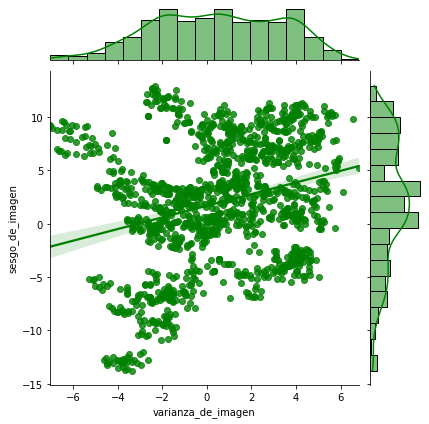

Correlacion entre varianza de imagen y curtosis ==>  -0.3808499719222592


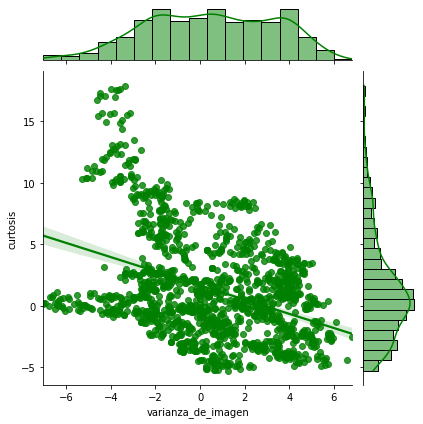

Correlacion entre varianza de imagen y entropia ==>  0.2768166961176217


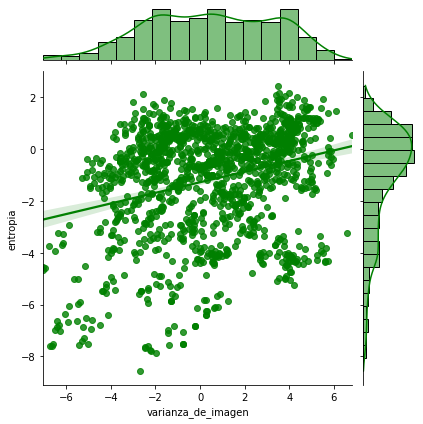

In [26]:
#Crear el join plot entre Varianza de imagen y el resto de las variables 

col = list(df.columns)
idx = col.index('varianza_de_imagen')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de varianza_de_imagen con otras variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlacion entre varianza de imagen y {col[i]} ==> ",df.corr().loc['varianza_de_imagen'][col[i]])
    sns.jointplot(x='varianza_de_imagen',y=col[i],data=df,kind = 'reg',color = 'green')
    plt.show()

Varianza de imagen muestra una asociación lineal débil positiva con las variables varianza de imagen y entropía del conjunto de datos dado. Eso significa que al aumentar la varianza de imagen, también aumenta la entropía y sesgo de imagen. Por el contrario, hay una correlación negativa con la variable curtosis. Esto significa que al disminuir la varianza de imagen, también disminuye la curtosis.

Joint plot de 'sesgo_de_imagen' con otras variables ==> 

Correlacion entre sesgo de imagen y curtosis ==>  -0.7868952243438824


<Figure size 500x400 with 0 Axes>

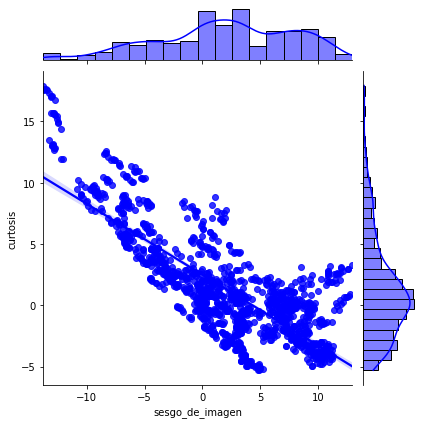

Correlacion entre sesgo de imagen y entropia ==>  -0.5263208424338817


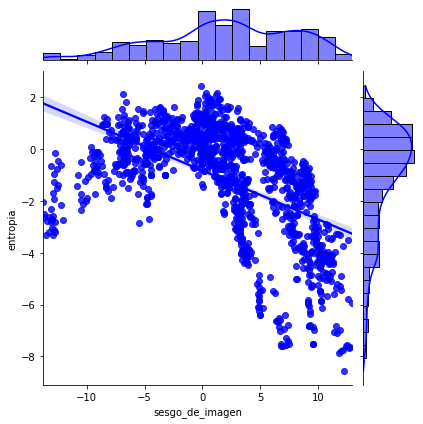

In [28]:
#Crear el join plot entre Varianza de imagen y el resto de las variables 

col = list(df.columns)
idx = col.index('sesgo_de_imagen')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de 'sesgo_de_imagen' con otras variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlacion entre sesgo de imagen y {col[i]} ==> ",df.corr().loc['sesgo_de_imagen'][col[i]])
    sns.jointplot(x='sesgo_de_imagen',y=col[i],data=df,kind = 'reg',color = 'blue')
    plt.show()

Por el contrario, hay una correlación negativa con la variable curtosis. Esto significa que al disminuir la varianza de imagen, también disminuye la curtosis.